In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-prediction/__results__.html
/kaggle/input/heart-disease-prediction/__resultx__.html
/kaggle/input/heart-disease-prediction/__notebook__.ipynb
/kaggle/input/heart-disease-prediction/__output__.json
/kaggle/input/heart-disease-prediction/custom.css
/kaggle/input/heart-disease-prediction/__results___files/__results___146_0.png
/kaggle/input/heart-disease-prediction/__results___files/__results___47_0.png
/kaggle/input/heart-disease-prediction/__results___files/__results___36_0.png
/kaggle/input/heart-disease-prediction/__results___files/__results___77_0.png
/kaggle/input/heart-disease-prediction/__results___files/__results___32_0.png
/kaggle/input/heart-disease-prediction/__results___files/__results___42_0.png
/kaggle/input/heartcsv/heart.csv


### If you have structured data use ensemble learning and in case of unstructured 
### data use deep learning or transfer learning 

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arezaei81/heartcsv")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/heartcsv


In [4]:
heart_disease = pd.read_csv("/kaggle/input/heartcsv/heart.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# No entry is empty 
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
x = heart_disease.drop("target" , axis=1)
y = heart_disease["target"]

In [7]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2)

In [8]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train , y_train)

RandomForestClassifier()

In [9]:
model.score(x_test , y_test)

0.8524590163934426

# Trying with a different model/estimator

In [10]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

clf.fit(x_train , y_train)

GaussianNB()

In [11]:
clf.score(x_test , y_test)

0.8032786885245902

# Linear SVC 

In [12]:
# from sklearn.svm import LinearSVC 

# clf = LinearSVC()
# clf.fit(x_train , y_train)

# clf.score(x_test , y_test)

### Make predictions using a machine learning model 

2 ways to make predictions:
1. `predict`
2. `predict_proba`

In [13]:
# use a trained model to make predictions 
y_preds = clf.predict(x_test)
np.array(y_test) 

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0])

In [14]:
y_test = np.array(y_test)
y_test

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0])

In [15]:
# this is the same thing as clf.score 
np.mean(y_test == y_preds)

0.8032786885245902

In [16]:
# One more way to check the accuracy 
from sklearn.metrics import accuracy_score 
accuracy_score(y_test , y_preds)

0.8032786885245902

### Make prediction with `predict_proba`

predict_proba tells you the model’s confidence for each class, and the predicted class is simply the one with the highest probability.

In [17]:
# predict_proba returns probabilities of a classification label 

clf.predict_proba(x_test[:5])

array([[9.99851846e-01, 1.48153593e-04],
       [9.99990941e-01, 9.05940284e-06],
       [9.99985737e-01, 1.42625150e-05],
       [4.40083825e-02, 9.55991617e-01],
       [4.70830956e-02, 9.52916904e-01]])

In [18]:
clf.predict(x_test[:5])

array([0, 0, 0, 1, 1])

### Evaluating a Machine learning Model
Three ways to evaluate scikit-learn models/estimators

1. Estimator's built in `score` method
2. The `scoring` parameter
3. Problem specific metric functions

### Estimator score method 

In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(x_train , y_train)

model.score(x_test , y_test)


0.8360655737704918

### Evaluating the model using the scoring parameter

In [20]:
from sklearn.model_selection import cross_val_score 

cross_val_score(model , x , y ) # here cv is by-default set to 5 so you see 5 outputs 


array([0.85245902, 0.86885246, 0.78688525, 0.81666667, 0.76666667])

In [21]:
cross_val_score(model , x , y , cv=10)

array([0.87096774, 0.83870968, 0.83870968, 0.9       , 0.9       ,
       0.86666667, 0.73333333, 0.83333333, 0.73333333, 0.76666667])

## Classification model evaluation metrics 

1. Accuracy
2. Area under Roc curve 
3. Confusion matrix
4. Classification Report

**Accuracy**
   



In [22]:
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

np.random.seed(42)

x = heart_disease.drop("target" , axis=1)
y = heart_disease["target"]

cross_val_score = cross_val_score(model , x , y , cv = 5)

cross_val_score 


array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [23]:
print(f"Heart disease classifier cross-validated Accuracy : {np.mean(cross_val_score) *100:.2f}%")

Heart disease classifier cross-validated Accuracy : 82.48%


**Area under the reciever operating characteristic curve (AUC / ROC)**

* Area under curve (AUC)
* Roc curve

Roc curve are a comparision of a model's true positive rate (tpr) versus a model's false positive rate (fpr)

* True positive = Model predicts 1 when the truth is also 1
* False positive = Model predicts 1 when truth is 0
* True negative = Model predicts 0 when truth is also 0
* False negative = Model predicts 0 when truth is 1 



In [24]:
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size = 0.2)
model.fit(x_train , y_train)

RandomForestClassifier()

In [25]:
y_probs = model.predict_proba(x_test)
y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [26]:
y_probs_positive = y_probs[:,1]
y_probs_positive

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 , 0.87,
       0.71, 0.96, 0.47, 0.85, 0.11, 0.81, 0.66, 0.06, 0.08, 0.95, 0.86,
       0.99, 0.81, 0.05, 0.36, 0.85, 0.16, 0.71, 0.49, 0.2 , 0.15, 0.24,
       0.6 , 0.92, 0.99, 0.85, 0.77, 0.19, 1.  , 0.4 , 0.76, 0.89, 0.33,
       0.  , 0.49, 0.04, 0.92, 0.8 , 0.38, 0.49, 0.23, 0.87, 0.31, 0.45,
       0.98, 0.71, 0.13, 0.98, 0.14, 0.07])

In [27]:
from sklearn.metrics import roc_curve 
fpr , tpr , thresholds = roc_curve(y_test , y_probs_positive )
fpr


array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

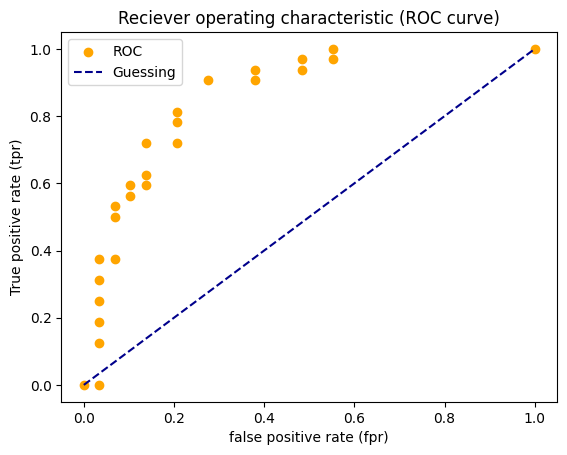

In [28]:
# create a function for crreating Roc curves 

import matplotlib.pyplot as plt 

def plot_roc_curve(fpr , tpr):

    plt.scatter(fpr , tpr , color="orange" , label = "ROC")
    
    # plot line with no predictive power (baseline)

    plt.plot([0,1],[0,1] , color="darkblue" , linestyle="--" , label="Guessing")

    # customising the plot 
    plt.xlabel("false positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Reciever operating characteristic (ROC curve)")
    plt.legend()
    plt.show()



plot_roc_curve(fpr , tpr)


In [29]:
## fpr = tpr =1 means it predicted everything as positive so all actual positives are correct hence tpr = 1 but since it predicted everything as 1 fpr is also one 
## for example out of 10 samples originally 2 were 1 and 8 as 0 but model predicted 
## all 10 as 1 so tpr =1 says it predicted every positive as positive that is 2 samples 
## but fpr is due to those 8 samples that is it predicted all 0's as 1 
## these are on different threshold values 